In [1]:
import pandapower as pp

In [2]:
net = pp.converter.from_mpc(
    mpc_file="../data/unicorn_56_import/unicorn_56.mat",
    f_hz=50,
    casename_mpc_file="mpc",
    validate_conversion=False,
)
net

/Users/nicholas/projects/feedback_opt/.venv/lib/python3.12/site-packages/pandapower/create.py:5049: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  net[table] = pd.concat([net[table], dd[dd.columns[~dd.isnull().all()]]], sort=False)
/Users/nicholas/projects/feedback_opt/.venv/lib/python3.12/site-packages/pandapower/converter/pypower/from_ppc.py:277: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  branch_lookup.loc[~is_line, "element"] = idx_trafo


This pandapower network includes the following parameter tables:
   - bus (56 elements)
   - load (50 elements)
   - sgen (2 elements)
   - ext_grid (1 element)
   - line (55 elements)
   - poly_cost (3 elements)

No or insufficient geodata available --> Creating artificial coordinates. This may take some time


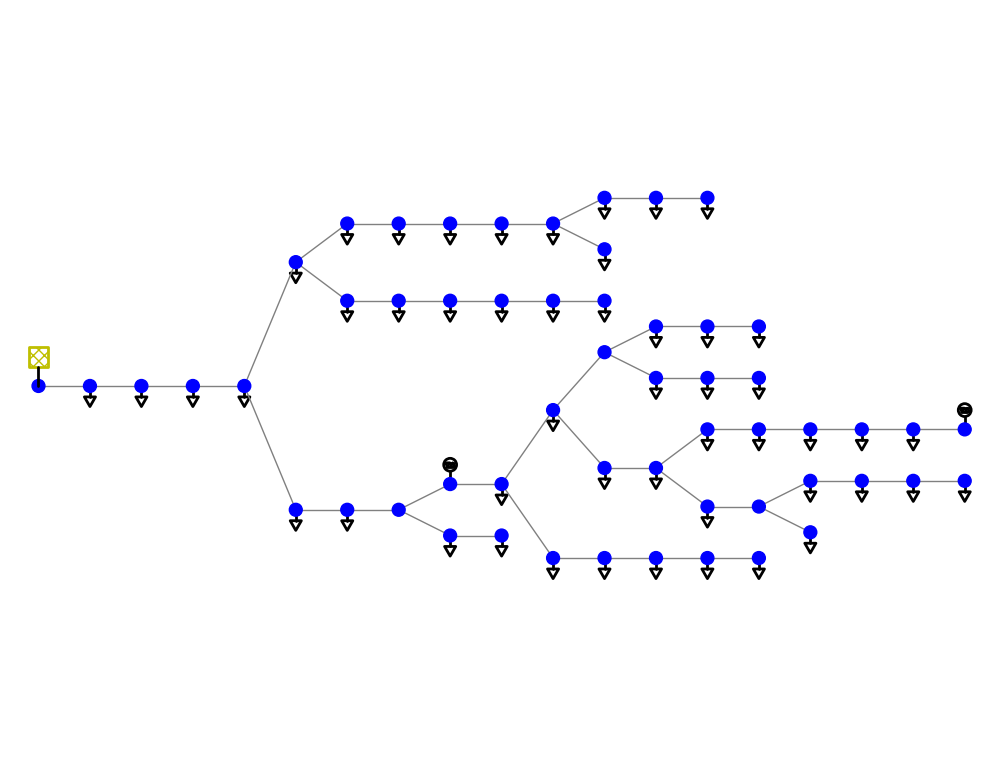

<Axes: >

In [3]:
pp.plotting.simple_plot(net, plot_loads=True, plot_sgens=True)

In [4]:
# clean bus table
if "zone" in net.bus:
    # drop zone
    net.bus = net.bus.drop(["zone"], axis=1)

num_bus = len(net.bus.index)
for i in range(num_bus):
    # name
    if i != 55:
        net.bus.loc[i, "name"] = f"bus_{i}"
    else:
        net.bus.loc[i, "name"] = "bus_substation"

# net.bus

In [5]:
# clean load table
num_load = len(net.load.index)
for i in range(num_load):
    # name
    net.load.loc[i, "name"] = f"load_{net.load.loc[i, 'bus']}"

net.load["p_mw"] *= 2.5  ## change
net.load["q_mvar"] *= 2.5  ## change

# net.load

In [6]:
# clean sgen table
num_sgen = len(net.sgen.index)
for i in range(num_sgen):
    # name
    net.sgen.loc[i, "name"] = f"pv_{i}"
    # type
    net.sgen.loc[i, "type"] = "PV"

net.sgen["max_p_mw"] *= 2.5  ## change
net.sgen["max_q_mvar"] *= 2.5  ## change
net.sgen["min_q_mvar"] *= 2.5  ## change

# net.sgen

In [7]:
# clean ext_grid table
net.ext_grid.loc[0, "name"] = "substation"

net.ext_grid

,name,bus,vm_pu,va_degree,slack_weight,in_service,min_p_mw,max_p_mw,min_q_mvar,max_q_mvar
0,substation,55,1.0,0.0,1.0,True,-200.0,200.0,-200.0,200.0


In [8]:
# clean line table
net.line = net.line.drop(["std_type"], axis=1)
num_line = len(net.line.index)
for i in range(num_line):
    # name
    net.line.loc[i, "name"] = f"line_{i}"

# net.line

In [9]:
del net.poly_cost

In [10]:
pp.to_json(net, "../data/unicorn_56.json")

In [11]:
pp.runpp(net)
print(net._pd2ppc_lookups["bus"])

pv = net._ppc["internal"]["pv"]
pq = net._ppc["internal"]["pq"]
ref = net._ppc["internal"]["ref"]
print(f"ref: {ref}")
print(f"pv: {pv}")
print(f"pq: {pq}")

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55]
ref: [55]
pv: []
pq: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]


In [12]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (56 elements)
   - load (50 elements)
   - sgen (2 elements)
   - ext_grid (1 element)
   - line (55 elements)
   - bus_geodata (56 elements)
 and the following results tables:
   - res_bus (56 elements)
   - res_line (55 elements)
   - res_ext_grid (1 element)
   - res_load (50 elements)
   - res_sgen (2 elements)
